<a href="https://colab.research.google.com/github/anagjurchinova/DataScience_2025/blob/main/Polynomial-Regression-and-Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/sample_data/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


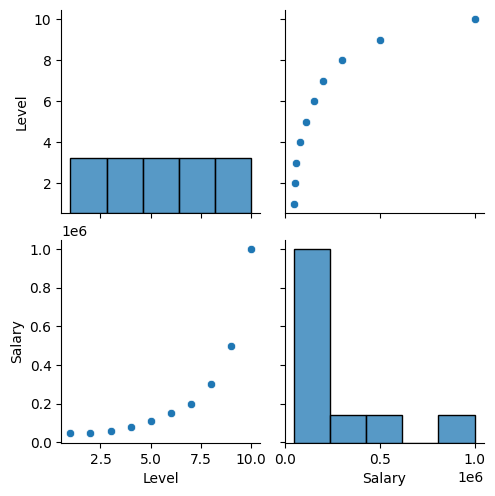

In [69]:
import seaborn as sns

sns.pairplot(data)

In [76]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,1:2].values
Y = data.iloc[:,2:3].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
Y_train=scaler.fit_transform(Y_train)
Y_test=scaler.transform(Y_test)

Text(0, 0.5, 'MSE')

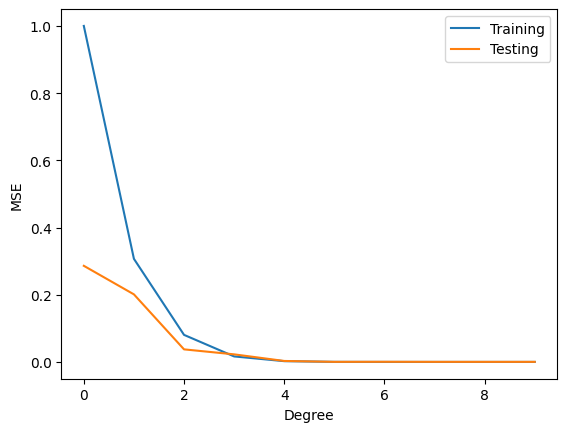

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Let's analyize the MSE we get for different polynomial degrees and choose the best one
train = []
test = []
for i in range(0,10):
  poly_features = PolynomialFeatures(degree = i)
  X_train_poly = poly_features.fit_transform(X_train)
  X_test_poly = poly_features.transform(X_test)

  model = LinearRegression()
  model.fit(X_train_poly, Y_train)

  train_score = mean_squared_error(Y_train, model.predict(X_train_poly))
  test_score = mean_squared_error(Y_test, model.predict(X_test_poly))
  train.append(train_score)
  test.append(test_score)

x = np.arange(10)
plt.plot(x,train,label='Training')
plt.plot(x,test,label='Testing')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('MSE')

In [81]:
poly_reg = PolynomialFeatures(4)

X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, Y_train)

y_pred=lin_reg.predict(X_test_poly)

training_score=mean_squared_error (Y_train,lin_reg.predict(X_train_poly))
test_score=mean_squared_error(Y_test,y_pred)
print("MSE for the training Dataset: " + str(training_score))
print("MSE for the testing Dataset: " +  str(test_score))

MSE for the training Dataset: 0.0022758394257178134
MSE for the testing Dataset: 0.0028384732741614767


# Ridge Regularization and Cross Validation

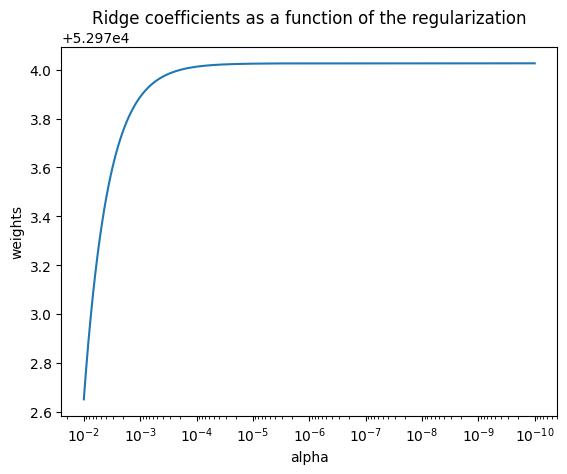

In [82]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
  ridge = Ridge(alpha=a, fit_intercept=False)
  ridge.fit(X,Y)
  coefs.append(ridge.coef_[0][0])

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

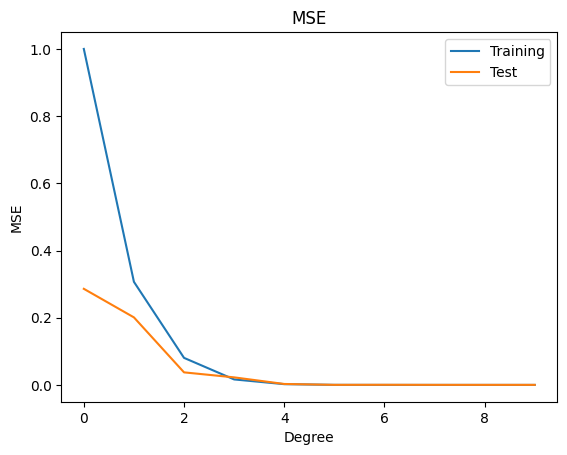

In [83]:
train = []
test = []

for i in range(10):
  model = KernelRidge(alpha=0.001, kernel='poly', degree=i, gamma=1, coef0=1)
  model.fit(X_train, Y_train)
  predictions = model.predict(X_test)
  train_score = mean_squared_error(Y_train, model.predict(X_train))
  test_score = mean_squared_error(Y_test, model.predict(X_test))
  train.append(train_score)
  test.append(test_score)

x=np.arange(10)
plt.plot(x,train,label="Training")
plt.plot(x,test,label="Test")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("MSE");
plt.show()

In [86]:
model = KernelRidge(alpha=0.001, kernel='poly', degree=4, gamma=1, coef0=1)
cv = RepeatedKFold(n_splits=6, n_repeats=5, random_state=1)

score = cross_val_score(model, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
score = absolute(score)

print('Mean MAE: %.3f (%.3f)' % (score.mean(), score.std()))
model.fit(X_train,Y_train)
y_pred = model.predict(Y_test)

print("MSE for the training Dataset: " + str(training_score))
print("MSE for the testing Dataset: " +  str(test_score))

Mean MAE: 0.222 (0.172)
MSE for the training Dataset: 0.0022758394257178134
MSE for the testing Dataset: 0.0001750220610808365
